# Showing the progress of framework migrations

## Exercise

### Background
In software systems, there is a need to change some code that is entangled in all the other code parts of your system. Especially when you need to replace a framework, huge efforts and endurance are needed to successfully change from one framework to the another. Here it is crucial to deliver  information about the current progress of the replacement activity.

### Your task

In this exercise, you should demonstrate the progress of the replacement of a database access framework. In particular, there is some code that uses a library called "Java Database Connectivity" (or "JDBC" for short). This library has many custom code that is now supported by a more advanced library called "Java Persistence API" (or "JPA" for short). Show the progress in regards of existing source code lines for both technologies!

### The dataset
There is already a code base where the replacement is ongoing. You also have a dataset from the Git repository that the team uses in `../datasets/git_log_database_refactoring.gz` .

In this dataset, you can find the following information for each change of each file:

* `additions`: number of the lines added
* `deletions`: number of the lines deleted
* `file`: the relative path of the file
* `timestamp`: the date of the commit

The `file` column contains some information about the framework technology used. Some directory names (= "package name" in the Java programming language) have a directory named `jdbc` and others have a directoy named `jpa`.

## Your solution

### Step 1: Load in the dataset

###### <span style="color:green;">SOLUTION <small>(Click the arrow on the left side if a hint is needed)</small></span>

In [ ]:
import pandas as pd

log = pd.read_csv("../datasets/git_log_database_refactoring.gz")
log.head()

additions  deletions                                               file  \
0         19          0  src/main/java/org/springframework/samples/petc...   
1         55          0  src/main/java/org/springframework/samples/petc...   
2         29          0  src/main/java/org/springframework/samples/petc...   
3          0         99  src/main/java/org/springframework/samples/petc...   
4         19          0  src/main/java/org/springframework/samples/petc...   

             timestamp  
0  2017-12-31 19:41:29  
1  2017-12-30 12:48:20  
2  2017-12-30 12:48:20  
3  2017-12-30 00:38:54  
4  2017-12-30 00:38:54

### Step 2: Parse the data as needed

###### <span style="color:green;">SOLUTION <small>(Click the arrow on the left side if a hint is needed)</small></span>

In [ ]:
log['timestamp'] = pd.to_datetime(log['timestamp'])
log.head()

additions  deletions                                               file  \
0         19          0  src/main/java/org/springframework/samples/petc...   
1         55          0  src/main/java/org/springframework/samples/petc...   
2         29          0  src/main/java/org/springframework/samples/petc...   
3          0         99  src/main/java/org/springframework/samples/petc...   
4         19          0  src/main/java/org/springframework/samples/petc...   

            timestamp  
0 2017-12-31 19:41:29  
1 2017-12-30 12:48:20  
2 2017-12-30 12:48:20  
3 2017-12-30 00:38:54  
4 2017-12-30 00:38:54

### Step 3: Find the information about the used technology

###### <span style="color:green;">SOLUTION <small>(Click the arrow on the left side if a hint is needed)</small></span>

In [ ]:
log['tech'] = log['file'].str.extract("/(jpa|jdbc)/")
log = log.dropna()
log.head()

additions  deletions                                               file  \
0           19          0  src/main/java/org/springframework/samples/petc...   
1           55          0  src/main/java/org/springframework/samples/petc...   
2           29          0  src/main/java/org/springframework/samples/petc...   
32           0         47  src/main/java/org/springframework/samples/petc...   
123          0         26  src/main/java/org/springframework/samples/petc...   

              timestamp tech  
0   2017-12-31 19:41:29  jpa  
1   2017-12-30 12:48:20  jpa  
2   2017-12-30 12:48:20  jpa  
32  2017-12-29 15:28:42  jpa  
123 2017-12-25 01:27:16  jpa

### Step 4: Estimate the lines of code

###### <span style="color:green;">SOLUTION <small>(Click the arrow on the left side if a hint is needed)</small></span>

In [ ]:
log['lines'] = log['additions'] - log['deletions']
log.head()

additions  deletions                                               file  \
0           19          0  src/main/java/org/springframework/samples/petc...   
1           55          0  src/main/java/org/springframework/samples/petc...   
2           29          0  src/main/java/org/springframework/samples/petc...   
32           0         47  src/main/java/org/springframework/samples/petc...   
123          0         26  src/main/java/org/springframework/samples/petc...   

              timestamp tech  lines  
0   2017-12-31 19:41:29  jpa     19  
1   2017-12-30 12:48:20  jpa     55  
2   2017-12-30 12:48:20  jpa     29  
32  2017-12-29 15:28:42  jpa    -47  
123 2017-12-25 01:27:16  jpa    -26

### Step 5: Track the progress over time
Hint: Sum up the lines of code along the timestamp and the used technology.

###### <span style="color:green;">SOLUTION <small>(Click the arrow on the left side if a hint is needed)</small></span>

In [ ]:
log_timed = log.groupby(['timestamp', 'tech']).lines.sum()
log_timed.head()

timestamp            tech
2013-05-15 03:35:33  jdbc    250
2013-05-16 02:15:44  jdbc     50
2013-05-17 15:12:26  jdbc     78
2013-05-24 05:52:31  jdbc    142
2013-05-28 08:15:35  jdbc    123
Name: lines, dtype: int64

### Step 6: List the progress of the tech replacement side by side
Hint: Unstack the dataframe first

###### <span style="color:green;">SOLUTION <small>(Click the arrow on the left side if a hint is needed)</small></span>

In [ ]:
log_progress = log_timed.unstack().fillna(0).cumsum()
log_progress.head()

tech                  jdbc  jpa
timestamp                      
2013-05-15 03:35:33  250.0  0.0
2013-05-16 02:15:44  300.0  0.0
2013-05-17 15:12:26  378.0  0.0
2013-05-24 05:52:31  520.0  0.0
2013-05-28 08:15:35  643.0  0.0

### Step 7: Visualize the progress of the replacement

###### <span style="color:green;">SOLUTION <small>(Click the arrow on the left side if a hint is needed)</small></span>

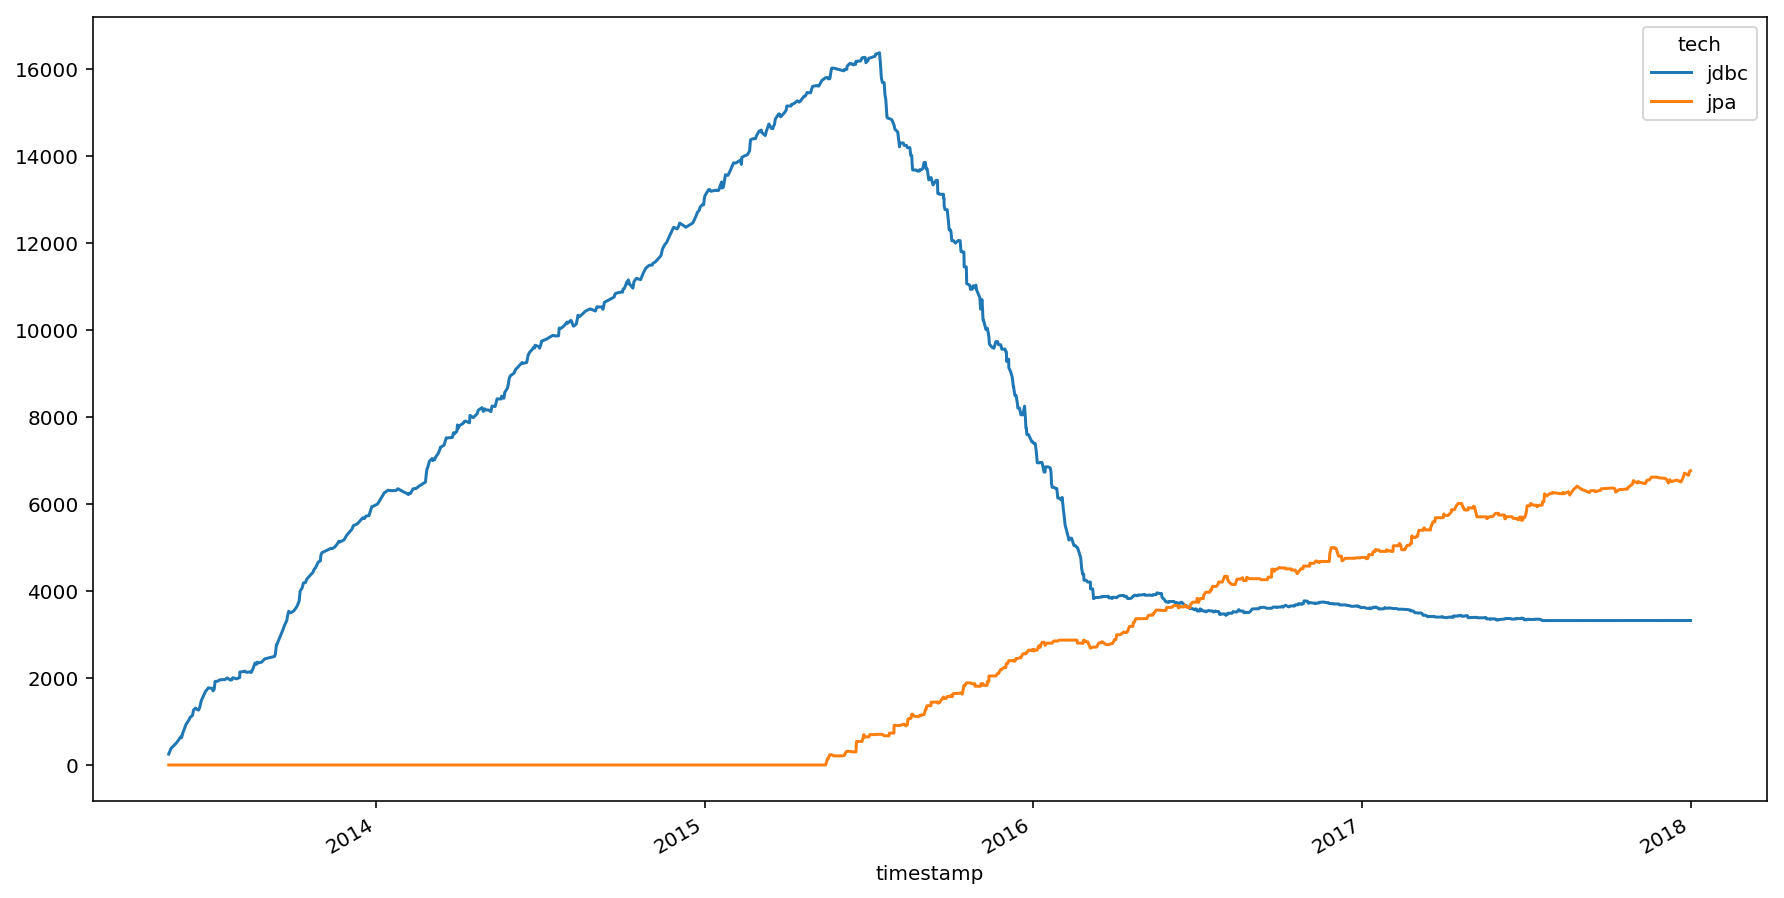

In [ ]:
%matplotlib inline
log_progress.plot(figsize=[15,8]);

### Step 8: What are your conclusions? Discuss!